### Perform Exploratory Data Analysis and Forecast of number of recipients and total annual costs associated with benefit payouts by month (based on current demographics) over the next 10 years. 
###  What will it be each year going forward from 2018 to 2030?

## Analysis and Results of this Notebook is summarized into 2 powerpoint(conver attached in the Directory. 
> Demographic_part1.pdf <br><br>
> Benefit_part2.pdf

### Load Libraries / Packages

In [156]:
import pandas as pd, numpy as np, seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
# We will use the Seaborn library
import seaborn as sns
sns.set()

### Read the data into a dataframe

In [157]:
df_rac_gend = pd.read_csv("singapore-citizens-by-ethnic-group-and-sex-end-june -annual.csv")
df_Demogr = pd.read_csv("Singapore Demographics.csv")
# df_Demogr.index.name = 'position'

### Check the shape of data

In [158]:
df_Demogr.shape

(10230, 4)

### Clean the data by dropping 'na' values

In [159]:
df_Demogr.drop(df_Demogr.index[df_Demogr['value'] == 'na'], inplace = True)

In [160]:
df_Demogr.head()

,year,level_1,level_2,value
0,1970,Total Citizen,0 - 4 Years,226454
1,1970,Total Citizen,5 - 9 Years,267122
2,1970,Total Citizen,10 - 14 Years,273014
3,1970,Total Citizen,15 - 19 Years,227001
4,1970,Total Citizen,20 - 24 Years,175775


### Convert columns to proper Data type

In [161]:
# df_rac_gend['year'] = pd.to_datetime(df_rac_gend.year, format='%Y')
df_Demogr['Date'] = pd.to_datetime(df_Demogr.year, format='%Y')
df_Demogr['value'] = df_Demogr['value'].astype(str).astype(int)

In [162]:
df_Demogr.head()

,year,level_1,level_2,value,Date
0,1970,Total Citizen,0 - 4 Years,226454,1970-01-01
1,1970,Total Citizen,5 - 9 Years,267122,1970-01-01
2,1970,Total Citizen,10 - 14 Years,273014,1970-01-01
3,1970,Total Citizen,15 - 19 Years,227001,1970-01-01
4,1970,Total Citizen,20 - 24 Years,175775,1970-01-01


### Print details of the Dataframe

In [163]:
df_Demogr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10200 entries, 0 to 10229
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   year     10200 non-null  int64         
 1   level_1  10200 non-null  object        
 2   level_2  10200 non-null  object        
 3   value    10200 non-null  int64         
 4   Date     10200 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 478.1+ KB


### Set Date Column as Index. May need it in visualization

In [164]:
df_Demogr = df_Demogr.set_index('Date')

### Sort the Data based on Date and Value

In [106]:
df_Demogr = df_Demogr.sort_values(by=['Date','value'], ascending=[True,False])

### Merge 'singapore-citizens-by-ethnic-group-and-sex-end-june -annual'  and 'Demographic" data. 

#### Commented out for now due to lack of clarity

In [107]:
# df_Demogr.merge(df_rac_gend, on=['year','level_1'])

### Group the data by Year and Ethnicity.

### Calculate Ethinicty percentage by Year 

In [108]:
grouped_ethnicity = df_Demogr.groupby(['year','level_1']).agg({'value': 'sum'})

grouped_ethnicity["percentage"] = grouped_ethnicity.groupby(level=0).transform(lambda x:  100*x / x.sum())

grouped_ethnicity = grouped_ethnicity.reset_index().sort_values(by=['year','percentage'], ascending=[True,False])

In [109]:
grouped_ethnicity[grouped_ethnicity['year']==2018]

,year,level_1,value,percentage
454,2018,Total Citizen,4619163,25.000000
453,2018,Total Chinese,3618614,19.584793
456,2018,Total Female Citizens,2400429,12.991688
462,2018,Total Male Citizens,2218734,12.008312
455,2018,Total Female Chinese,1892548,10.242916
461,2018,Total Male Chinese,1726066,9.341876
460,2018,Total Malays,616182,3.334922
459,2018,Total Indians,321285,1.738870
458,2018,Total Female Malays,311977,1.688493
464,2018,Total Male Malays,304205,1.646429


### Filter Citizens from the data and Pivot the Table for Visualization

In [110]:
pd.pivot_table(grouped_ethnicity[~grouped_ethnicity['level_1'].isin(['Total Male Citizens', 
                'Total Female Citizens', 'Total Citizen'])],values='value', index=['year'],columns='level_1').head()

level_1,Other Ethnic Groups (Females),Other Ethnic Groups (Males),Other Ethnic Groups (Total),Total Chinese,Total Female Chinese,Total Female Indians,Total Female Malays,Total Indians,Total Malays,Total Male Chinese,Total Male Indians,Total Male Malays
year,,,,,,,,,,,,
1970,10644,10605,21249,1571142,784814,46586,130450,115281,272558,786328,68695,142108
1980,10598,10374,20972,1920352,966940,59441,154734,135249,321650,953412,75808,166916
1990,14794,14372,29166,2336891,1190920,87977,195822,194502,403418,1145971,106525,207596
1991,15433,14908,30338,2374729,1211473,90417,200272,199201,412447,1163264,108783,212175
1992,16093,15376,31472,2409485,1231003,93164,205673,204368,422718,1178481,111206,217043


#### Explore the Over all trend in population

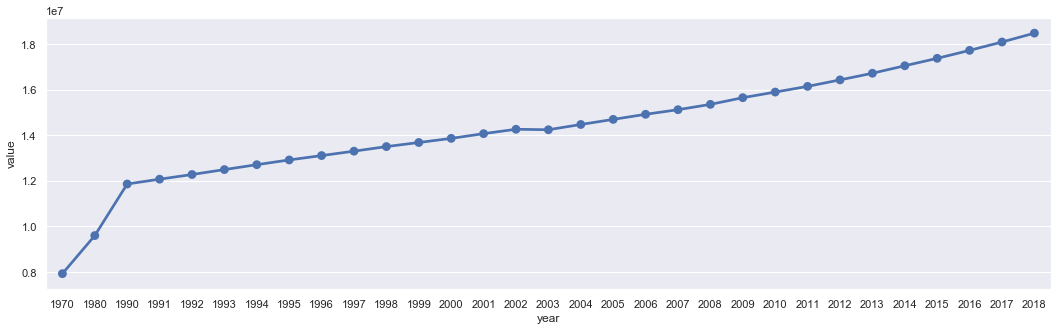

In [111]:
fig, ax = plt.subplots(figsize=(18, 5))

g = sns.pointplot(ax=ax, data = df_Demogr.groupby('year').agg({'value':'sum'}).reset_index(), 
                  x = 'year', y = 'value', size = 10, fit_reg=False)

### Bar chart to explore Categorical Variable (ehinicity).

#### There are lot of Chinese people in Singapore across all years. Followed by Malays. 

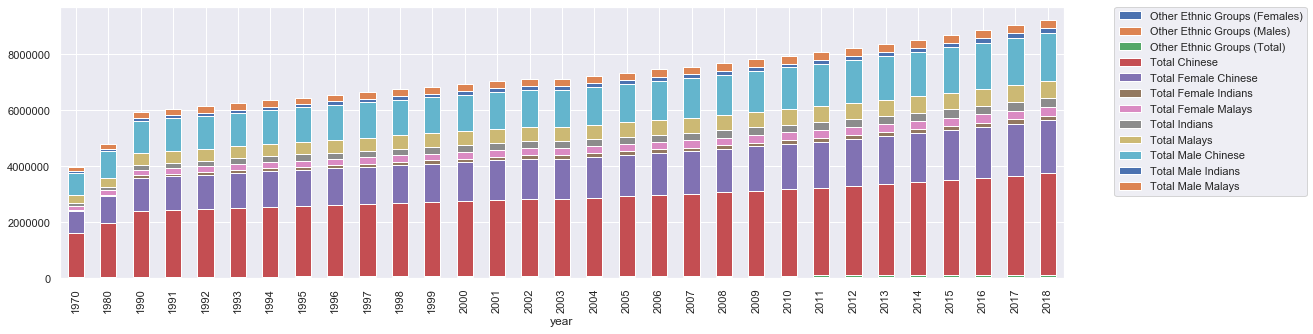

In [112]:
fig, ax = plt.subplots(figsize=(18, 5))

pd.pivot_table(grouped_ethnicity[~grouped_ethnicity['level_1'].isin(['Total Male Citizens', 'Total Female Citizens', 'Total Citizen'])],values='value', index=['year'], 
               columns='level_1').plot(ax=ax, kind='bar', stacked=True)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [113]:
# fig, ax = plt.subplots(figsize=(18, 5))

# pd.pivot_table(groupped_data ,values='percentage', index=['year'], 
#                columns='level_1').plot(ax=ax, kind='bar', stacked=True)

# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


### Trend Line charts to further explore the Categorical Variables "Ethinicity" 

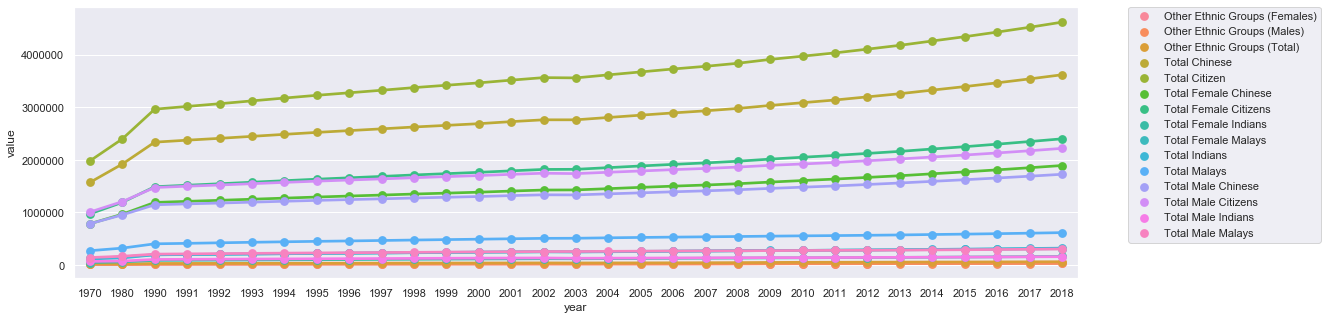

In [114]:
fig, ax = plt.subplots(figsize=(18, 5))

g = sns.pointplot(ax=ax, data = df_Demogr.groupby(['year','level_1'], as_index = False).agg({'value': 'sum'}), 
                  x = 'year', y = 'value', hue = 'level_1', 
                  size = 10, fit_reg=False)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


### Trend Line charts to further explore the Categorical Variable  "Age Group"

#### Thre is a huge uptrend for people 65 years and Over after 2005

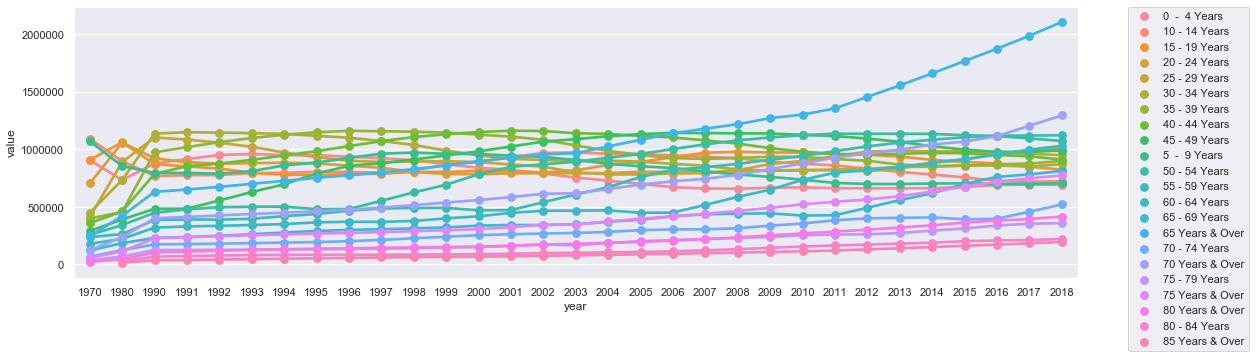

In [115]:
fig, ax = plt.subplots(figsize=(18, 5))

g = sns.pointplot(ax=ax, data = df_Demogr.groupby(['year','level_2'], as_index = False).agg({'value': 'sum'}), 
                  x = 'year', y = 'value', hue = 'level_2', 
                  size = 10, fit_reg=False)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### The relationship between Population (value) and Ethinicity (Level_1) for different subsets of the data.

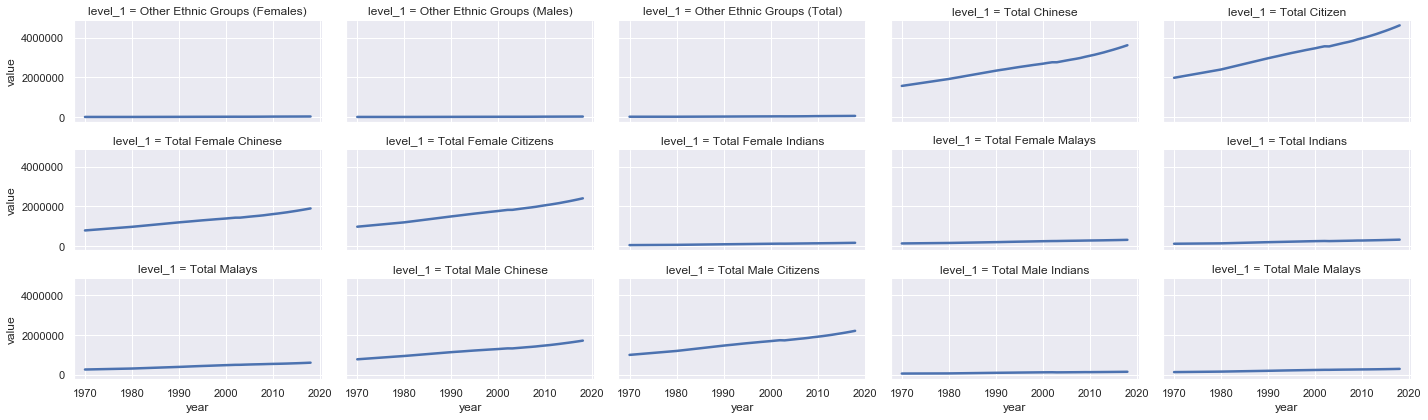

In [116]:
df_grouped_eth = df_Demogr.groupby(['year','level_1']).agg({'value':'sum'}).reset_index()

sns.relplot(x="year", y="value",
            col="level_1", col_wrap=5,
            height=2, aspect=2, linewidth=2.5,
            kind="line", data=df_grouped_eth, dashes=False)

### The relationship between Population (value) and Age Group (Level_2) for different subsets of the data.

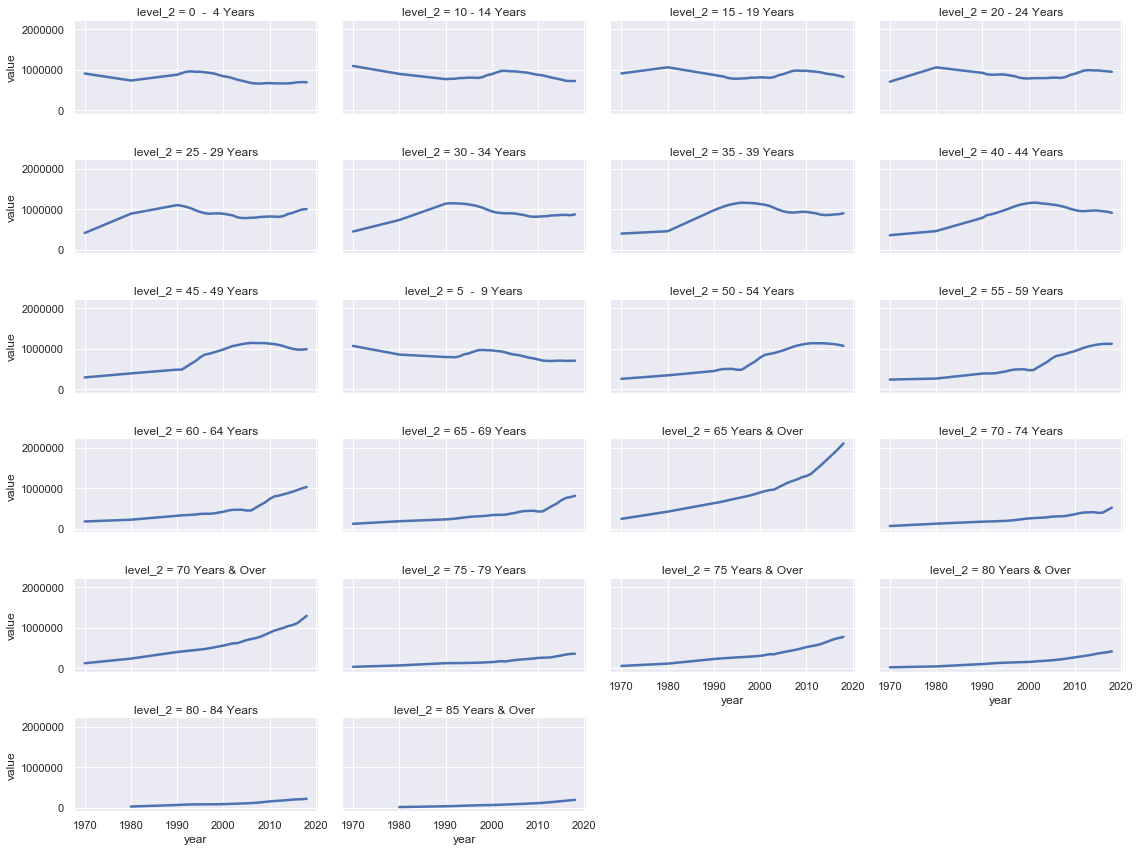

In [117]:
df_grouped_age = df_Demogr.groupby(['year','level_2']).agg({'value':'sum'}).reset_index()

sns.relplot(x="year", y="value",
            col="level_2", col_wrap=4,
            height=2, aspect=2, linewidth=2.5,
            kind="line", data=df_grouped_age, dashes=False)

#### Calculate Year of Year Percentage change by Ethinicity (Level2)

In [22]:
df_Demogr_grouped = df_grouped_eth[df_grouped_eth.year>=1990]

pd.pivot_table(df_Demogr_grouped[~df_Demogr_grouped['level_1'].isin(['Total Male Citizens',
        'Total Female Citizens', 'Total Citizen'])],values='value', index=['level_1'], 
           columns='year').pct_change(axis='columns').head()

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
level_1,,,,,,,,,,,,,,,,,,,,,
Other Ethnic Groups (Females),NaN,0.043193,0.042766,0.041633,0.035495,0.036525,0.025345,0.026453,0.027831,0.021528,...,0.069495,0.054495,0.017627,0.021545,0.026696,0.027912,0.014142,0.028674,0.027970,0.028293
Other Ethnic Groups (Males),NaN,0.037295,0.031393,0.033039,0.029652,0.025680,0.021520,0.025502,0.016844,0.011752,...,0.070612,0.057397,0.019375,0.024339,0.035191,0.026168,0.017651,0.026398,0.024590,0.028269
Other Ethnic Groups (Total),NaN,0.040184,0.037379,0.037239,0.032778,0.031026,0.023734,0.025938,0.022570,0.016876,...,0.070020,0.055861,0.018450,0.022863,0.030708,0.027085,0.015805,0.027593,0.026367,0.028282
Total Chinese,NaN,0.016192,0.014636,0.015747,0.015589,0.014855,0.013573,0.013048,0.013586,0.011808,...,0.019129,0.017311,0.016583,0.019000,0.018800,0.020871,0.020089,0.021107,0.021538,0.022227
Total Female Chinese,NaN,0.017258,0.016121,0.016940,0.016628,0.016146,0.014759,0.014143,0.014650,0.012806,...,0.020099,0.018623,0.017307,0.019388,0.019038,0.021715,0.020692,0.022031,0.022331,0.022672


### Plot the Year of Year Percentage change by Ethinicity (Level2)

#### Altough the Population has been increasing but when we look at the YOY rate then we can clearly see a down trend between 1990 to 2003. But After 2010 it look like the YOY rate is up trending.

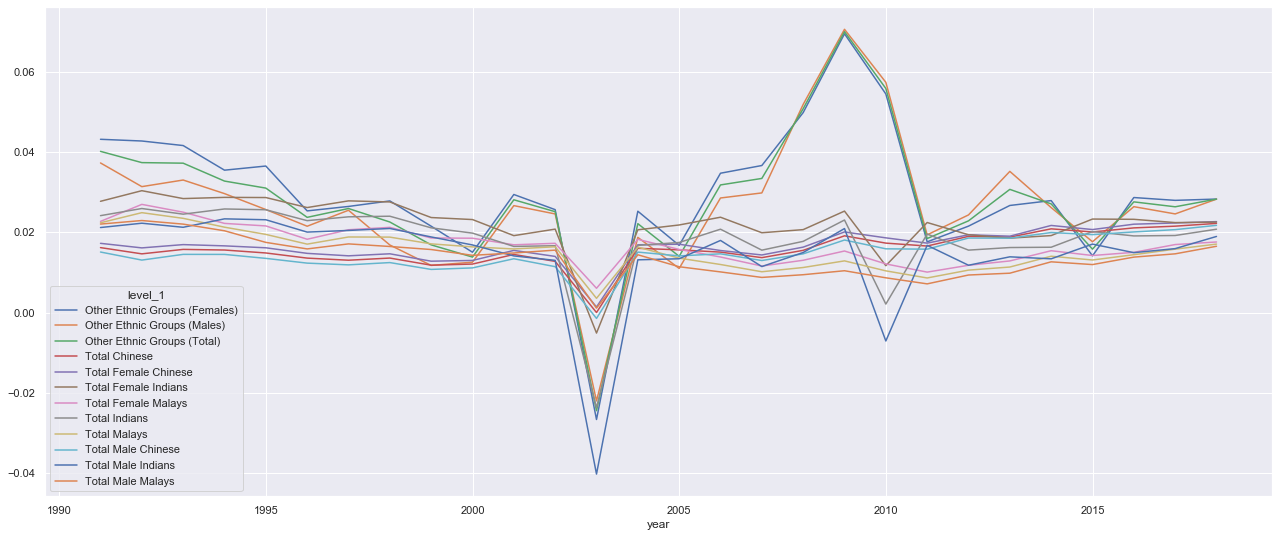

In [23]:
pd.pivot_table(df_Demogr_grouped[~df_Demogr_grouped['level_1'].isin(['Total Male Citizens',
        'Total Female Citizens', 'Total Citizen'])],values='value', index=['level_1'], 
           columns='year').pct_change(axis='columns').T.plot(figsize=[22,9])

# Modelling / Forecasting

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

from xgboost import XGBRegressor 
from xgboost import plot_importance

In [52]:
df_pivot = df_Demogr.copy()

In [53]:
df_pivot = df_pivot[df_pivot.year>1990]

In [54]:
df_pivot = pd.pivot_table(df_pivot,values='value', index=['level_1','level_2'], columns='year').reset_index()
df_pivot.index.names = ['position']
df_pivot = df_pivot.reset_index()

In [55]:
df_pivot = df_pivot.reindex(df_pivot.columns.tolist() + [2019,2020,2021,2022,2023,2024,2025], axis=1) 

In [56]:
df_pivot.head()

year,position,level_1,level_2,1991,1992,1993,1994,1995,1996,1997,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,0,Other Ethnic Groups (Females),0 - 4 Years,1654,1900,2063,2129,2193,2149,2037,...,2664,2659,2576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Other Ethnic Groups (Females),10 - 14 Years,868,922,985,1049,1132,1180,1235,...,2064,2186,2240,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Other Ethnic Groups (Females),15 - 19 Years,761,768,781,793,831,893,931,...,2095,2092,2080,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Other Ethnic Groups (Females),20 - 24 Years,888,815,820,818,822,800,820,...,1679,1729,1786,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Other Ethnic Groups (Females),25 - 29 Years,1111,1110,1033,995,1018,1021,942,...,1529,1623,1641,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df_melt = pd.melt(df_pivot, id_vars=['position','level_1','level_2'], var_name=['year'], value_name='value')

In [58]:
df_melt.sort_values(['position', 'year'], ascending=[True, True], inplace=True)

In [59]:
df_melt.head()

,position,level_1,level_2,year,value
0,0,Other Ethnic Groups (Females),0 - 4 Years,1991,1654.0
330,0,Other Ethnic Groups (Females),0 - 4 Years,1992,1900.0
660,0,Other Ethnic Groups (Females),0 - 4 Years,1993,2063.0
990,0,Other Ethnic Groups (Females),0 - 4 Years,1994,2129.0
1320,0,Other Ethnic Groups (Females),0 - 4 Years,1995,2193.0


In [60]:
df = df_melt.copy()

In [61]:
for i in range(0, 10):
    print(F'Lagging by {str(i+1)}')
    df[F'lag_{str(i+1)}'] = df.groupby('position').value.shift(i+1)

Lagging by 1
Lagging by 2
Lagging by 3
Lagging by 4
Lagging by 5
Lagging by 6
Lagging by 7
Lagging by 8
Lagging by 9
Lagging by 10


In [62]:
# Will Use it at the Last
df_score = df[df.year>=2019]
del df_score['value']
df_score = df_score.dropna()

#### Drop NAN values

In [63]:
df = df.dropna()

In [64]:
df.shape

(5940, 15)

In [65]:
df.year = df.year.astype(int)

### Convert categorical variable into dummy/indicator variables.

In [66]:
df = pd.get_dummies(df, columns=['level_1','level_2'])

In [67]:
y = df.value
X = df.drop(columns = ['value', 'position'], axis=1)

### Split data into Training and Test 

In [68]:
X_train = X.loc[X.year != 2018]
X_test = X.loc[X.year == 2018]

Y_train = y.loc[X_train.index]
Y_test = y.loc[X_test.index]

### Build Linear Regression Model

In [69]:
model_lr = LinearRegression()
model_lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
model_lr.score(X_test, Y_test)

0.99978095975766

### Build XGBoost model

In [71]:
model_XG = XGBRegressor(colsample_bytree=0.4,
             gamma=0,                 
             learning_rate=0.07,
             max_depth=10,
             min_child_weight=1.5,
             n_estimators=100,                                                                    
             reg_alpha=0.75,
             reg_lambda=2.25,
             subsample=0.5,
#              booster = 'gblinear',                       
             seed=42)

In [72]:
model_XG.fit(X_train,Y_train, eval_set = [(X_test, Y_test)], eval_metric = 'mae', verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=10,
             min_child_weight=1.5, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0.75,
             reg_lambda=2.25, scale_pos_weight=1, seed=42, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Feature Importance

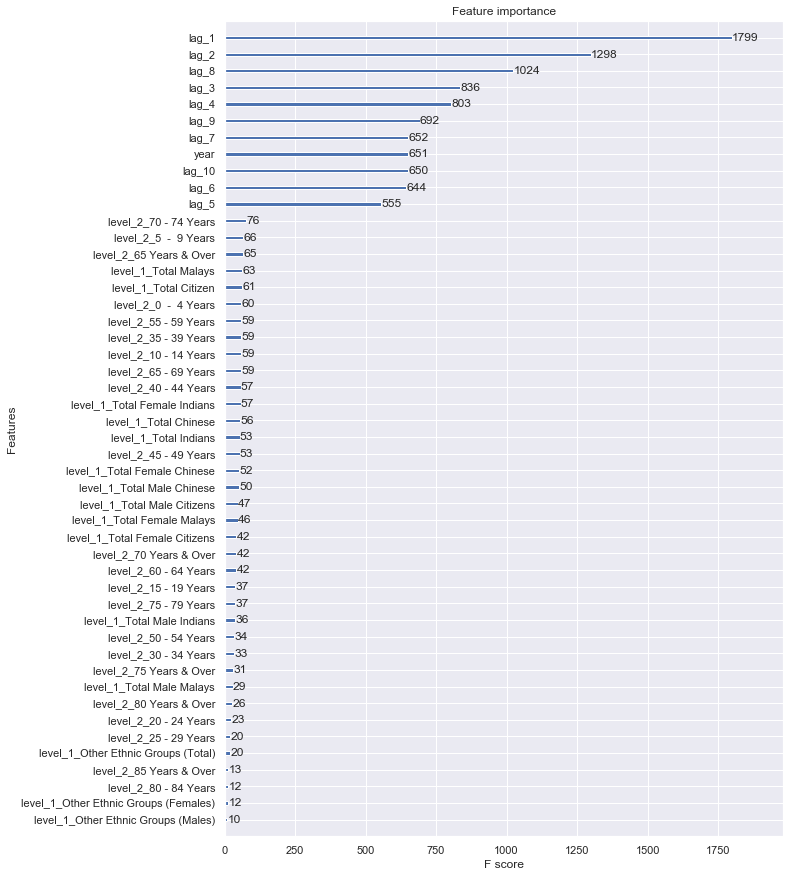

In [73]:
ax = plot_importance(model_XG)
fig = ax.figure
fig.set_size_inches(10, 15)

### Model Evaluation

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
import math

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def model_accuracy(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return 100 - np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def  evaluate(y_act, y_pred):
    mae = mean_absolute_error(y_act, y_pred)
    mape = mean_absolute_percentage_error(y_act, y_pred)
    accuracy = model_accuracy(y_act, y_pred)
    mse = mean_squared_error(y_act,y_pred)
    rms = math.sqrt(mean_squared_error(y_act, y_pred))
    vs = explained_variance_score(y_act, y_pred)
    r2 = r2_score(y_act, y_pred)
    return {
        'r2': r2,
        'vs': vs,
        'rms': rms,
        'mse': mse,
        'accuracy': accuracy,
        'mae': mae,
        'mape': mape
        
    }

### Model Evaluation Metrices for Linear Regression 

In [75]:
evaluate(Y_test, model_lr.predict(X_test))

{'r2': 0.99978095975766,
 'vs': 0.9997818532596577,
 'rms': 1124.7066658513788,
 'mse': 1264965.0842105253,
 'accuracy': 96.50439071023418,
 'mae': 634.5536068879385,
 'mape': 3.495609289765824}

### Model Evaluation Metrices for XGBoost

In [76]:
evaluate(Y_test, model_XG.predict(X_test))

{'r2': 0.9952276960320248,
 'vs': 0.9952927956060162,
 'rms': 5249.783123535148,
 'mse': 27560222.84415445,
 'accuracy': 96.63412902750225,
 'mae': 1485.137069609671,
 'mape': 3.3658709724977474}

### Compare Train Test Errors of different Model Predictions

	########## Train vs Test Error accross different ML Models ##########

                   Train Error  Test Error
Linear Regression     0.063100    0.034956
XGboost               0.021817    0.033659


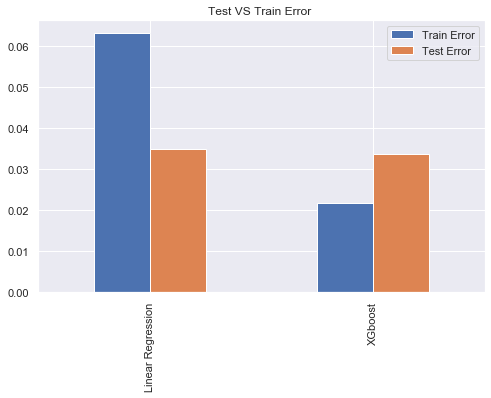

In [49]:
def train_test_error(model, X_test, X_train, Y_test, Y_train):
    test_pred = model.predict(X_test)
    train_pred = model.predict(X_train)
    error_test = np.abs((test_pred - Y_test) / Y_test).mean()
    error_train = np.abs((train_pred - Y_train) / Y_train).mean()
    return error_test, error_train

# Calculate Linear Regression Error
error_test_lr, error_train_lr = train_test_error(model_lr, 
                                                 X_test.loc[Y_test[Y_test != 0].index], 
                                                 X_train.loc[Y_train[Y_train!=0].index], 
                                                 Y_test[Y_test != 0], 
                                                 Y_train[Y_train != 0])

# Calculate XGBOOST Error
error_test_xg, error_train_xg = train_test_error(model_XG, 
                                                 X_test.loc[Y_test[Y_test != 0].index], 
                                                 X_train.loc[Y_train[Y_train!=0].index], 
                                                 Y_test[Y_test != 0], 
                                                 Y_train[Y_train != 0])


train_error = [error_train_lr, error_train_xg ]
test_error = [error_test_lr, error_test_xg]
    

# Create a dataframe for all the error
df = pd.DataFrame({'Train Error': train_error, 'Test Error': test_error}, 
             index = ['Linear Regression', 'XGboost'])

print("\t########## Train vs Test Error accross different ML Models ##########\n")
print(df)

df.plot(kind='bar',figsize=[8,5])
plt.title(F'Test VS Train Error ')
plt.show()

### Plot Actual vs Pridiction

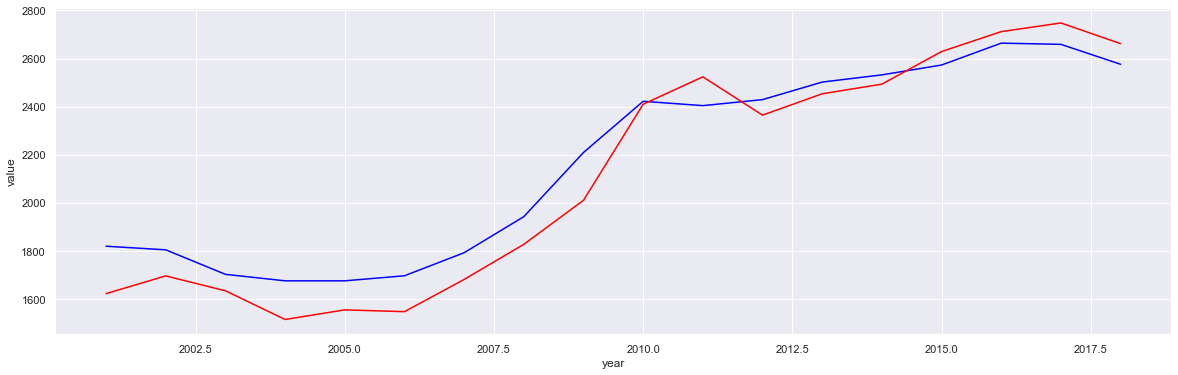

In [77]:
position = 0
plt.figure(figsize=(20,6))
sns.lineplot(x = 'year', y='value', data=df.loc[df.position == position],color='blue')
sns.lineplot(x = df.loc[df.position == position].year, y = model_lr.predict(X.loc[df.loc[
    df.position == position].index]),color='red')

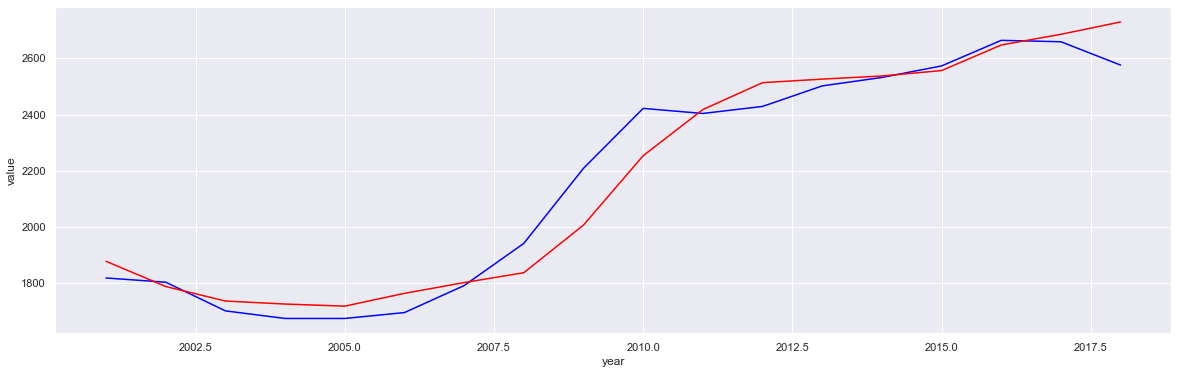

In [78]:
position = 0
plt.figure(figsize=(20,6))
sns.lineplot(x = 'year', y='value', data=df.loc[df.position == position],color='blue')
sns.lineplot(x = df.loc[df.position == position].year, y = model_XG.predict(X.loc[df.loc[
    df.position == position].index]),color='red')

# predictions based on identified trends in the data. 

In [ ]:
# # list of level_1 
# level_1 = [
#     'Total Citizen',
#     'Total Chinese',
#     'Total Male Citizens',
#     'Total Female Citizens',
#     'Total Male Chinese',
#     'Total Female Chinese',
#     'Total Malays',
#     'Total Male Malays',
#     'Total Female Malays',
#     'Total Indians',
#     'Total Male Indians',
#     'Total Female Indians',
#     'Other Ethnic Groups (Total)',
#     'Other Ethnic Groups (Males)',
#     'Other Ethnic Groups (Females)',
#     ]
  
# # list of lst2 
# level_2 = [
#     '10 - 14 Years',
#     '5  -  9 Years',
#     '15 - 19 Years',
#     '0  -  4 Years',
#     '20 - 24 Years',
#     '30 - 34 Years',
#     '25 - 29 Years',
#     '35 - 39 Years',
#     '40 - 44 Years',
#     '45 - 49 Years',
#     '50 - 54 Years',
#     '65 Years & Over',
#     '55 - 59 Years',
#     '60 - 64 Years',
#     '70 Years & Over',
#     '65 - 69 Years',
#     '70 - 74 Years',
#     '75 Years & Over',
#     '75 - 79 Years',
#     '80 Years & Over',
#     '80 - 84 Years',
#     '85 Years & Over',
#     ]


# mapping = {0: 2019, 
#           1: 2020,
#           2: 2021,
#           3: 2022,
#           4: 2023,
#           5: 2024,
#           6: 2025,}
  
# # Calling DataFrame constructor after zipping 
# # both lists, with columns specified 
# df_scoring = pd.DataFrame(list(zip(level_1, level_2)), 
#                columns =['level_1', 'level_2']) 


# df_scoring = df_scoring.append([df_scoring]*6,ignore_index=True)
# df_scoring['year'] = df_scoring.groupby(['level_1','level_2']).cumcount()
# df_scoring['year'] = np.nan
# df_scoring = df_scoring.replace({"year": mapping})
# df_scoring = pd.get_dummies(df_scoring, columns=['level_1','level_2'])


# # for i in range(1, 11):
# #     print(F'Lagging by {str(i)}')
# #     df_scoring[F'lag_{str(i)}'] = df_scoring.groupby('position').value.shift(i+1)

In [79]:
df_score

,position,level_1,level_2,year,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
9240,0,Other Ethnic Groups (Females),0 - 4 Years,2019,2576.0,2659.0,2664.0,2573.0,2532.0,2502.0,2429.0,2404.0,2422.0,2209.0
9241,1,Other Ethnic Groups (Females),10 - 14 Years,2019,2240.0,2186.0,2064.0,2041.0,2051.0,2042.0,2088.0,2084.0,2033.0,1907.0
9242,2,Other Ethnic Groups (Females),15 - 19 Years,2019,2080.0,2092.0,2095.0,2026.0,1934.0,1858.0,1789.0,1782.0,1731.0,1649.0
9243,3,Other Ethnic Groups (Females),20 - 24 Years,2019,1786.0,1729.0,1679.0,1613.0,1591.0,1638.0,1579.0,1470.0,1409.0,1356.0
9244,4,Other Ethnic Groups (Females),25 - 29 Years,2019,1641.0,1623.0,1529.0,1447.0,1444.0,1344.0,1301.0,1341.0,1390.0,1266.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9565,325,Total Male Malays,75 - 79 Years,2019,2883.0,2975.0,3087.0,3013.0,3025.0,2957.0,2946.0,2859.0,2759.0,2530.0
9566,326,Total Male Malays,75 Years & Over,2019,6281.0,6256.0,6324.0,6155.0,5977.0,5744.0,5631.0,5502.0,5389.0,5081.0
9567,327,Total Male Malays,80 - 84 Years,2019,2048.0,1979.0,1951.0,1874.0,1728.0,1657.0,1614.0,1646.0,1666.0,1645.0
9568,328,Total Male Malays,80 Years & Over,2019,3398.0,3281.0,3237.0,3142.0,2952.0,2787.0,2685.0,2643.0,2630.0,2551.0


In [80]:
df_score['level_1_orig'] = df_score['level_1']
df_score['level_2_orig'] = df_score['level_2']

In [81]:
df_final = pd.get_dummies(df_score, columns=['level_1','level_2'])
    
del df_final['position']
del df_final['level_1_orig']
del df_final['level_2_orig']

In [82]:
prediction = pd.DataFrame(model_lr.predict(df_final))

In [83]:
prediction.index = df_score.index

In [84]:
df_score['prediction'] = prediction

In [85]:
df_score = df_score[['year','level_1_orig','level_2_orig','prediction']].sort_values(by='prediction', ascending=False)

In [121]:
df_score.head(30)

,year,level_1_orig,level_2_orig,prediction
9342,2019,Total Citizen,65 Years & Over,553516.911324
9320,2019,Total Chinese,65 Years & Over,467885.453192
9344,2019,Total Citizen,70 Years & Over,342595.254127
9386,2019,Total Female Citizens,65 Years & Over,302276.383048
9322,2019,Total Chinese,70 Years & Over,293300.066814
9339,2019,Total Citizen,55 - 59 Years,282682.595539
9340,2019,Total Citizen,60 - 64 Years,264474.106288
9338,2019,Total Citizen,50 - 54 Years,263311.512095
9364,2019,Total Female Chinese,65 Years & Over,255868.515573
9332,2019,Total Citizen,25 - 29 Years,252326.408268


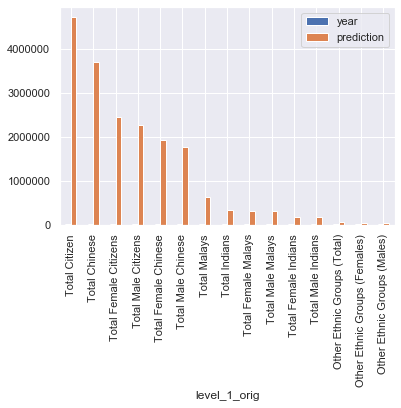

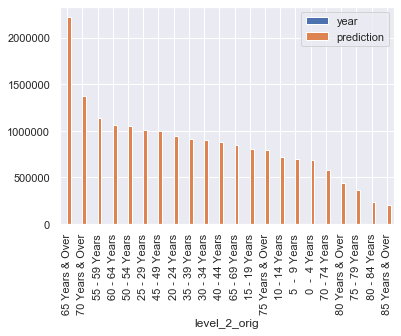

In [87]:
df_score.groupby(['year','level_1_orig']).agg({'prediction':'sum'}).reset_index().set_index('level_1_orig').sort_values(by='prediction', ascending=False).plot.bar()

df_score.groupby(['year','level_2_orig']).agg({'prediction':'sum'}).reset_index().set_index('level_2_orig').sort_values(by='prediction', ascending=False).plot.bar()

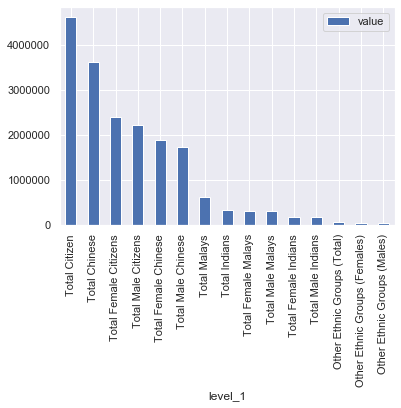

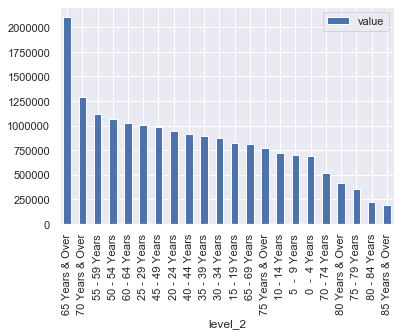

In [88]:
df_Demogr[df_Demogr.year==2018].groupby(['level_1']).agg({'value':'sum'}).reset_index().set_index('level_1').sort_values(by='value', ascending=False).plot.bar()


df_Demogr[df_Demogr.year==2018].groupby(['level_2']).agg({'value':'sum'}).reset_index().set_index('level_2').sort_values(by='value', ascending=False).plot.bar()

<Figure size 576x288 with 0 Axes>

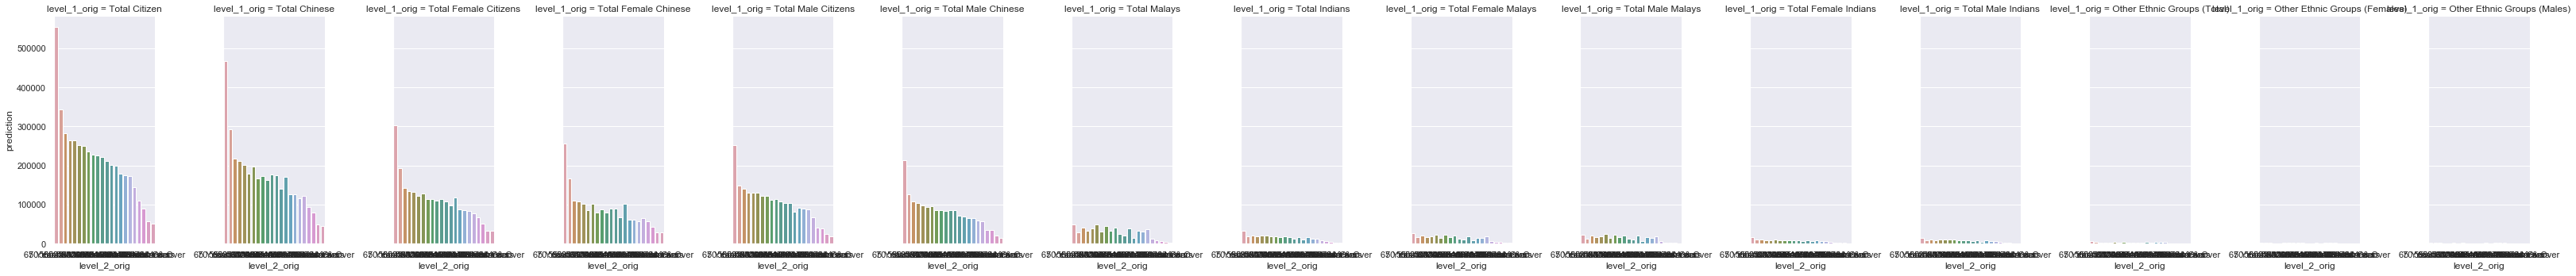

In [89]:
# plt.figure(figsize=(8,4)) # this creates a figure 8 inch wide, 4 inch high


# g = sns.catplot(x="level_2_orig", y="prediction", col="level_1_orig",
#                 data=df_score, saturation=.5,
#                 kind="bar", ci=None, aspect=.6)

# plt.show()